In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 99% 1.06G/1.06G [00:11<00:00, 46.8MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# !pip install tensorflow

In [ ]:
# imoprt all libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
# for validations
validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# here daata is store in numpy array
#  so now normalize the data
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
#this process do for do data range from 0 to 1

In [ ]:
# now create a cnn model
# 3conv add
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit -->store data in history for ploting in future
history = model.fit(train_ds, epochs=3, validation_data=validation_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.5724 - loss: 0.7191 - val_accuracy: 0.7262 - val_loss: 0.5459
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7323 - loss: 0.5374 - val_accuracy: 0.7822 - val_loss: 0.4757
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8022 - loss: 0.4239 - val_accuracy: 0.7678 - val_loss: 0.5646


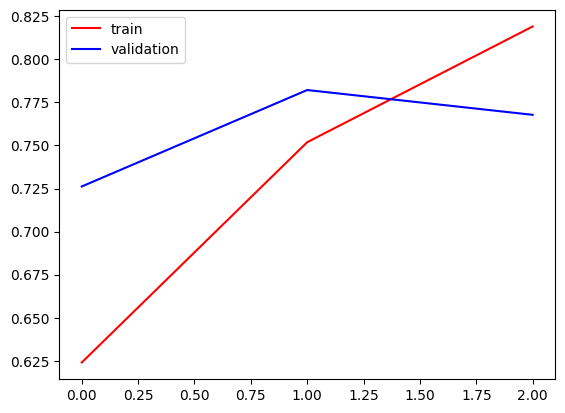

In [ ]:
# /plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

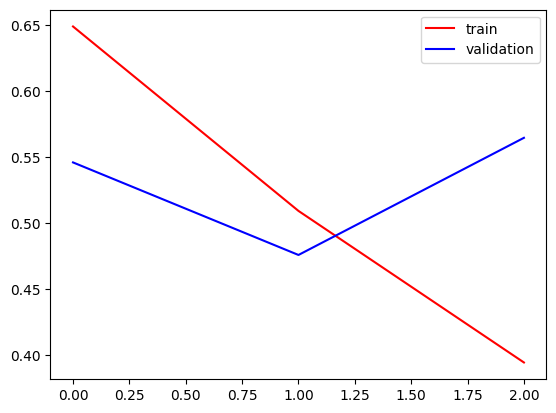

In [ ]:
# plot trainig loss and validation loss

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# show the overfitting in thses graph


In [ ]:
# way to reduce overfitting

# Add more data
# Data augmentation
# Dropout
# Batch normalization
# Regularization
# Early stopping
# reduce complexity of model


In [ ]:
# batch normalizations and dropout
# now create a cnn model
# 3conv add
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model1.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model1.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
Dropout(0.1)
model1.add(Dense(64, activation='relu'))
Dropout(0.1)
model1.add(Dense(1, activation='sigmoid'))

# then again run compile and fit
# compile
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# and again plot for accuracy
# fit -->store data in history for ploting in future
history1 = model1.fit(train_ds, epochs=3, validation_data=validation_ds)



Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.5951 - loss: 2.6445 - val_accuracy: 0.6438 - val_loss: 0.7972
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.7208 - loss: 0.5733 - val_accuracy: 0.7260 - val_loss: 0.5632
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7790 - loss: 0.4670 - val_accuracy: 0.7954 - val_loss: 0.4532


AttributeError: 'History' object has no attribute 'history1'

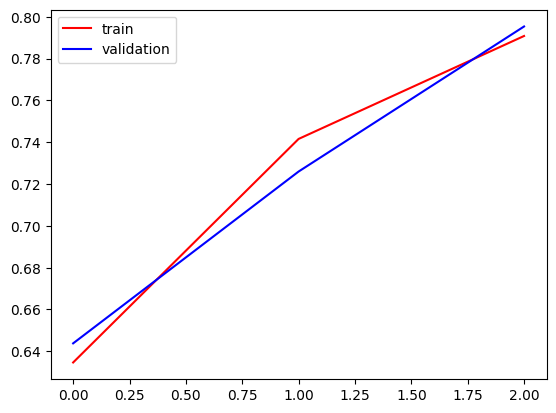

In [ ]:
# /plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], color='red', label='train')
plt.plot(history1.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

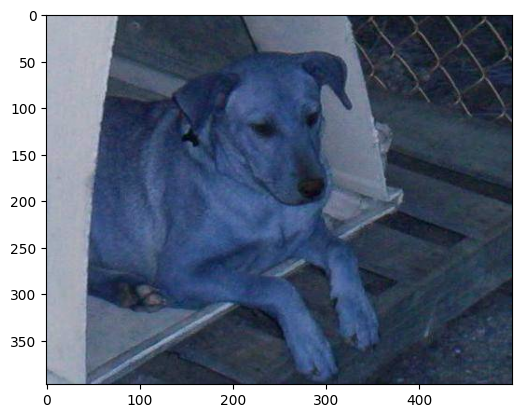

In [ ]:
# now start the predictions
# download the dog and cat image from internet
# then use
import cv2
# test_image = cv2.imread('/content/dog.jpg')

# plt.imshow(test_image)

path ="/content/catsvsdogs/test/dogs/dog.100.jpg"

test_image = cv2.imread(path)

plt.imshow(test_image)

In [ ]:
test_image.shape

(397, 500, 3)

In [ ]:

# this image is big so resize
test_image = cv2.resize(test_image, (256, 256))

In [ ]:
# while training we pass data image in batch
# but here we pass 1 image so reshape it
test_image = test_image.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_image)
# 1 for dog
# 0 for cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.99999857]], dtype=float32)

In [ ]:
# save the model
model.save('/content/cnn_dogvscat_model.h5')

In [ ]:
# load the model and predict the image from upload option of image
from keras.models import load_model
from google.colab import files
import numpy as np
from keras.preprocessing import image

# Load the model
model = load_model('/content/cnn_dogvscat_model.h5')

# Function to predict an uploaded image
def predict_uploaded_image():
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image
        path = fn
        img = image.load_img(path, target_size=(256, 256))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255. # Normalize the image

        # Make prediction
        prediction = model.predict(img_array)

        # Interpret the prediction
        if prediction[0][0] > 0.5:
            print(f"The image is likely a dog with a score of {prediction[0][0]:.4f}")
        else:
            print(f"The image is likely a cat with a score of {prediction[0][0]:.4f}")

# Call the function to upload and predict
predict_uploaded_image()

Saving car.jpg to car.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
The image is likely a dog with a score of 0.5265


In [ ]:
# same thing do for cat